##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
#%pip install pandas 
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# Can have as many cells as you want for code
import pandas as pd
import numpy as np
filepath = "./data/datathon.parquet" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [3]:
data = pd.read_csv("catA_train.csv")
data['Business Life Cycle'] = np.nan
data.head(5)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Business Life Cycle
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,NaN
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,NaN
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,NaN
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,NaN
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,NaN


In [4]:
data.dtypes

LATITUDE                               float64
LONGITUDE                              float64
AccountID                               object
Company                                 object
SIC Code                               float64
Industry                                object
8-Digit SIC Code                       float64
8-Digit SIC Description                 object
Year Found                             float64
Entity Type                             object
Parent Company                          object
Parent Country                          object
Ownership Type                          object
Company Description                     object
Square Footage                         float64
Company Status (Active/Inactive)        object
Employees (Single Site)                float64
Employees (Domestic Ultimate Total)    float64
Employees (Global Ultimate Total)      float64
Sales (Domestic Ultimate Total USD)    float64
Sales (Global Ultimate Total USD)      float64
Import/Export

In [5]:
data.isnull().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [6]:
#Company life cycle
for index, row in data.iterrows():
    if not row['Year Found']: 
        continue
    age = 2024 - row['Year Found']
    if age <= 3:
        data.loc[index, 'Business Life Cycle'] = 'Startup'
    elif age <= 15:
        data.loc[index, 'Business Life Cycle'] = 'Growth'
    elif age <= 25:
        data.loc[index, 'Business Life Cycle'] = 'Maturity'
    else:
        data.loc[index, 'Business Life Cycle'] = 'Decline'

data.head(5)


,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Business Life Cycle
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,Growth
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,Growth
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,Decline
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,Maturity
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,Maturity


In [38]:
#Associated companies (creating copy of data due to data cleaning requirements)
data_copy = pd.read_csv('catA_train.csv')
data_copy.dropna(subset=['Sales (Global Ultimate Total USD)'], inplace=True)
data_copy.dropna(subset=['Employees (Global Ultimate Total)'], inplace=True)
data_copy['Sales to Employees Ratio'] = data_copy['Sales (Global Ultimate Total USD)']/data_copy['Employees (Global Ultimate Total)']
data_copy['Associated Companies'] = np.nan
data_copy.head(5)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Sales to Employees Ratio,Associated Companies
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,7.093536e+07,NaN
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,2.565770e+05,NaN
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,7.339898e+08,NaN
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,1.080532e+05,NaN
5,1.444773,103.812740,LAKB2BID2264578,SEMCO SALVAGE (V) PTE LTD,4959.0,"Sanitary Services, Not Elsewhere Classified",49590000.0,"Sanitary services, nec",1986.0,Subsidiary,...,1.026308e+06,NaN,NaN,QUETZAL CAPITAL PTE. LTD.,Singapore,QUETZAL CAPITAL PTE. LTD.,0.0,0.0,2.565770e+05,NaN


In [39]:
companies_list = list(data_copy['Company'])

global_ultimate_dict = {}
for index, row in data_copy.iterrows():
    if row['Global Ultimate Company'] not in global_ultimate_dict:
        global_ultimate_dict[row['Global Ultimate Company']] = 0
    global_ultimate_dict[row['Global Ultimate Company']] += 1
    

In [40]:
for index, row in data_copy.iterrows():
    data_copy.loc[index, 'Associated Companies'] = global_ultimate_dict[row['Global Ultimate Company']]

data_copy.head(5)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Sales to Employees Ratio,Associated Companies
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,7.093536e+07,10.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,2.565770e+05,1.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,7.339898e+08,82.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,1.080532e+05,2.0
5,1.444773,103.812740,LAKB2BID2264578,SEMCO SALVAGE (V) PTE LTD,4959.0,"Sanitary Services, Not Elsewhere Classified",49590000.0,"Sanitary services, nec",1986.0,Subsidiary,...,1.026308e+06,NaN,NaN,QUETZAL CAPITAL PTE. LTD.,Singapore,QUETZAL CAPITAL PTE. LTD.,0.0,0.0,2.565770e+05,27.0


Hypothesis Test for Business Life Cycle

In [27]:
from scipy.stats import f_oneway
# Prepare the data for the ANOVA test
categories = data['Business Life Cycle'].unique()
hypothesis = [data[data['Business Life Cycle'] == category]['Sales (Global Ultimate Total USD)'] for category in categories]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*hypothesis)

# Print the F-statistic and p-value
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 17.985883928489834, p-value: 1.1734842456419287e-11


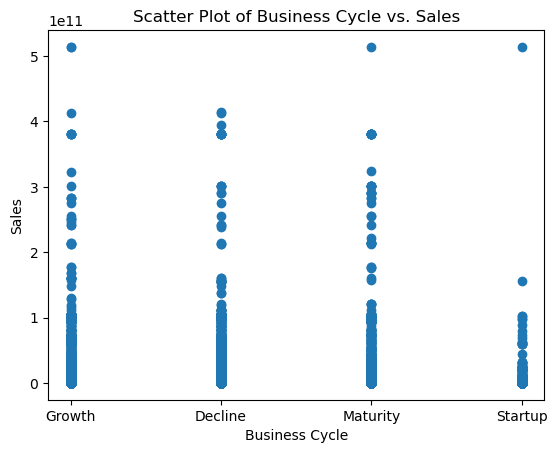

In [30]:
business_cycle = data['Business Life Cycle']
sales = data['Sales (Global Ultimate Total USD)']
plt.scatter(business_cycle, sales)
plt.xlabel('Business Cycle')
plt.ylabel('Sales')
plt.title('Scatter Plot of Business Cycle vs. Sales')
plt.show()

Hypothesis Test for Number of Associated Companies

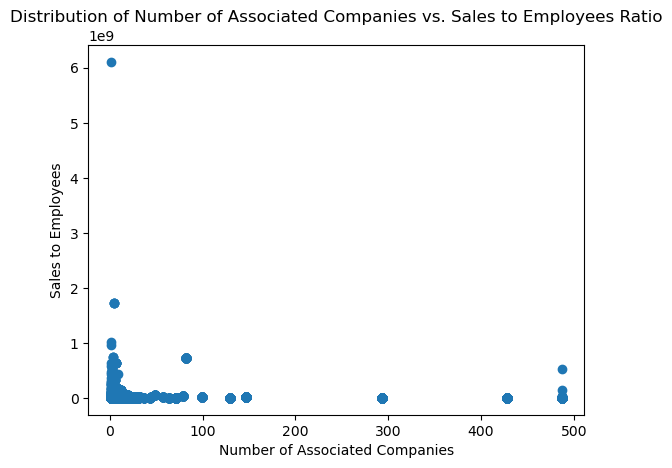

In [41]:
x = data_copy['Associated Companies']
y = data_copy['Sales to Employees Ratio']
plt.scatter(x, y)
plt.xlabel('Number of Associated Companies')
plt.ylabel('Sales to Employees')
plt.title('Distribution of Number of Associated Companies vs. Sales to Employees Ratio')
plt.show()

In [42]:
from scipy.stats import spearmanr

In [44]:
# Calculate Kendall Tau's rank correlation coefficient
tau, p_value = spearmanr(x, y)

# Print the correlation coefficient and p-value
print(f"Kendall's Tau: {tau}, p-value: {p_value}")

Kendall's Tau: 0.2546401255828238, p-value: 0.0


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [18]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [19]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

FileNotFoundError: [Errno 2] No such file or directory: './data/datathon.parquet'

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!